In [1]:
%load_ext autoreload
%autoreload 2

# Generación de datos

In [ ]:
from src.data_gen import generate_instances

instances = generate_instances(filename="TSP50.pkl", instance_count=100, cities=50, seed=42)

In [23]:
from src.data_gen import generate_train_data

generate_train_data(instance_file="TSP50.pkl", data_filename="TSP50_data.pkl")

# Entrenamiento

In [2]:
from src.training import load_data

dataset = load_data(file_path="TSP50_data.pkl")

In [12]:
from src.models.transformer_v2 import TSPTransformer

# Parámetros del modelo
input_dim = 2
embed_dim = 64
num_heads = 4
head_dim = 32
num_layers = 2
dropout = 0.1

# Crear modelo
model = TSPTransformer(
    input_dim=input_dim,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_layers=num_layers,
    dropout_rate=dropout
)

In [13]:
from src.training import train

epochs = 100
train_size = 1000
test_size = 200
batch_size = 32
learning_rate = 1e-4
seed = 42

stats = train(model, dataset, epochs, train_size, test_size, batch_size, learning_rate, seed)

Usando dispositivo: cpu
Epoch 1/100 - Train Loss: 3.8370, Train Accuracy: 13.70% - Val Loss: 3.8336, Val Accuracy: 11.50%
Epoch 2/100 - Train Loss: 3.7940, Train Accuracy: 16.80% - Val Loss: 3.8063, Val Accuracy: 14.00%
Epoch 3/100 - Train Loss: 3.7901, Train Accuracy: 16.40% - Val Loss: 3.8052, Val Accuracy: 15.00%
Epoch 4/100 - Train Loss: 3.7761, Train Accuracy: 17.30% - Val Loss: 3.8141, Val Accuracy: 12.50%
Epoch 5/100 - Train Loss: 3.7863, Train Accuracy: 15.60% - Val Loss: 3.8180, Val Accuracy: 12.00%
Epoch 6/100 - Train Loss: 3.7835, Train Accuracy: 16.90% - Val Loss: 3.8123, Val Accuracy: 13.50%
Epoch 7/100 - Train Loss: 3.7772, Train Accuracy: 17.30% - Val Loss: 3.8118, Val Accuracy: 12.50%
Epoch 8/100 - Train Loss: 3.7797, Train Accuracy: 17.20% - Val Loss: 3.8094, Val Accuracy: 14.00%
Epoch 9/100 - Train Loss: 3.7713, Train Accuracy: 17.70% - Val Loss: 3.8160, Val Accuracy: 12.50%
Epoch 10/100 - Train Loss: 3.7738, Train Accuracy: 17.30% - Val Loss: 3.8108, Val Accuracy: 13

In [132]:
from src.training import save_model
save_model(model, filename="model3.pth")

# Validación

Predicted cost: 5.956637445142287


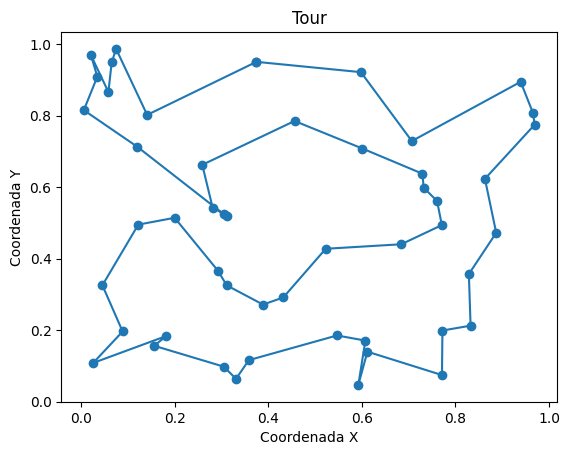

In [14]:
from src.solvers.model import ModelSolver

model_solver = ModelSolver(model)
model_sol = model_solver.solve(instance_file="TSP50.pkl", instance_number=0)

print("Predicted cost:", model_sol.cost)
model_sol.plot()

Optimal cost: 5.393124245897437


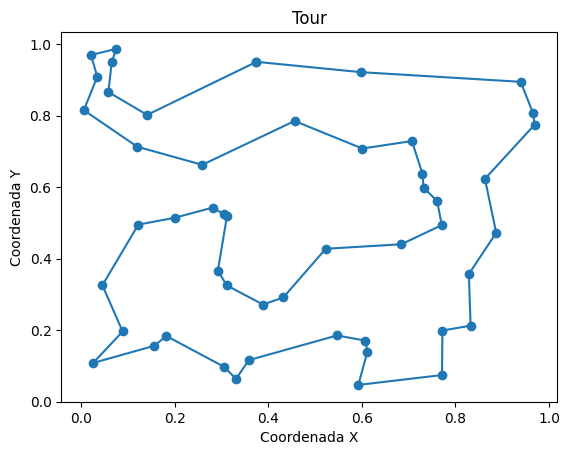

In [15]:
from src.data_gen import read_instances
from src.solvers.ortools import solve

instances = read_instances("TSP50.pkl")
instance = instances[0]
ortools_sol = solve(instance)
print("Optimal cost:", ortools_sol.cost)
ortools_sol.plot()

In [16]:
from src.solvers.ortools import solve
from src.solvers.model import ModelSolver

instances = read_instances("benchmarks/b50.pkl")
model_costs = []
opt_costs = []

model_solver = ModelSolver(model)

for i, instance in enumerate(instances):
    model_sol = model_solver.solve(instance_file="benchmarks/b50.pkl", instance_number=i)
    ortools_sol = solve(instance)

    model_costs.append(model_sol.cost)
    opt_costs.append(ortools_sol.cost)

print("Avg gap (%):", sum((mc - oc) / oc * 100 for mc, oc in zip(model_costs, opt_costs)) / len(opt_costs))

Avg gap (%): 8.041592598639328
